# ACTIVIDAD GUIADA 1


1. Se ha realizado una encuesta a 100 familias preguntando por el número de coches que poseen, los resultados han sido los siguientes:


    1.1. Introducir estos datos en un dataframe en R

In [1]:
NroVehiculos <- c(1, 2, 3, 4, 5)
NroFamilias <- c(45, 34, 15, 4, 2)
encuesta <- data.frame(NroVehiculos, NroFamilias)

In [2]:
head(encuesta)

NroVehiculos,NroFamilias
1,45
2,34
3,15
4,4
5,2


    1.2. Añadir columnas con la:
* frecuencia relativa
* frecuencia absoluta acumulada 
* frecuencia relativa acumulada

Comentar brevemente los resultados.

__frecuencia relativa:__ la frecuencia relativa nos informa acerca de la proporción o el peso que tiene algún valor u observación en la muestra. Esto la hace de especial utilidad, dado que a diferencia de la frecuencia absoluta, la frecuencia relativa nos va a permitir hacer comparaciones entre muestras de tamaños distintos. Esta se puede expresar como un valor decimal, como fracción o como porcentaje.
* fi = frecuencia absoluta / cantidad total de elementos
* fi = ni/sum(ni)

In [3]:
encuesta['fi'] <- encuesta$NroFamilias/sum(encuesta$NroFamilias)

__frecuencia absoluta acumulada:__ es el resultado de ir sumando las frecuencias absolutas de las observaciones o valores de una población o muestra.

Para calcular la frecuencia absoluta acumulada (Ni), hay que calcular primero la frecuencia absoluta (ni) de la población o muestra.

In [4]:
encuesta['Ni'] <- cumsum(encuesta$NroFamilias)

__frecuencia relativa acumulada:__ La frecuencia relativa acumulada es el resultado de ir sumando las frecuencias relativas de las observaciones o valores de una población o muestra. 

Para calcular la frecuencia relativa acumulada, hay que calcular primero la frecuencia absoluta (ni) y la frecuencia relativa (fi) de los valores de la población o muestra.
Para ello, los datos se ordenan de menor a mayor y se colocan en una tabla.

In [5]:
encuesta['Fi'] <- encuesta$Ni/sum(encuesta$NroFamilias)

In [6]:
head(encuesta)

NroVehiculos,NroFamilias,fi,Ni,Fi
1,45,0.45,45,0.45
2,34,0.34,79,0.79
3,15,0.15,94,0.94
4,4,0.04,98,0.98
5,2,0.02,100,1.00


### 2. Utilizando el dataset iris, sobre la columna Sepal.Width realizar un análisis incluyendo el cálculo de medidas de tendencia central, de dispersión y de forma, apoyando los resultados sobre los gráficos necesarios y comentando las deducciones realizadas.

In [7]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [8]:
attach(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


### __Medidas de tendencia central__ 

Son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. Representan un centro en torno al cual se encuentra ubicado el conjunto de los datos. Las medidas de tendencia central más utilizadas son: media, mediana y moda. 

In [9]:
SepalWidth = iris$Sepal.Width


__media:__ La media aritmética es la suma de todos los datos dividida entre el número total de datos. 

In [10]:
mean(SepalWidth)

[1] 3.057333

__Mediana:__ La mediana de un conjunto de números es el número medio en el conjunto (después que los números han sido arreglados del menor al mayor) o, si hay un número par de datos, la mediana es el promedio de los dos números medios.

In [11]:
median(SepalWidth)

[1] 3

__Moda:__ a moda de un conjunto de números es el número que aparece más a menudo.

In [12]:
moda=function(x) {
    q=table(x)
    q=sort(q,TRUE)
    return(q[1])
     }

In [13]:
moda(SepalWidth)

3 
26

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


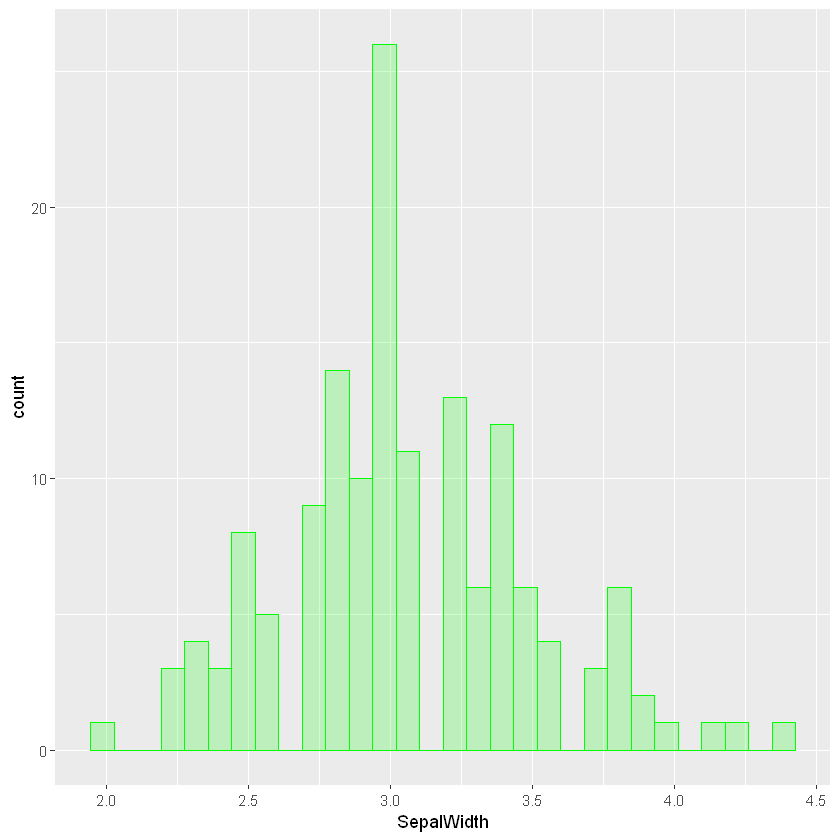

In [15]:
hg <- ggplot(aes(x = SepalWidth), data = iris) + 
        geom_histogram(color = 'green', fill = 'green', alpha = 0.2)
hg

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


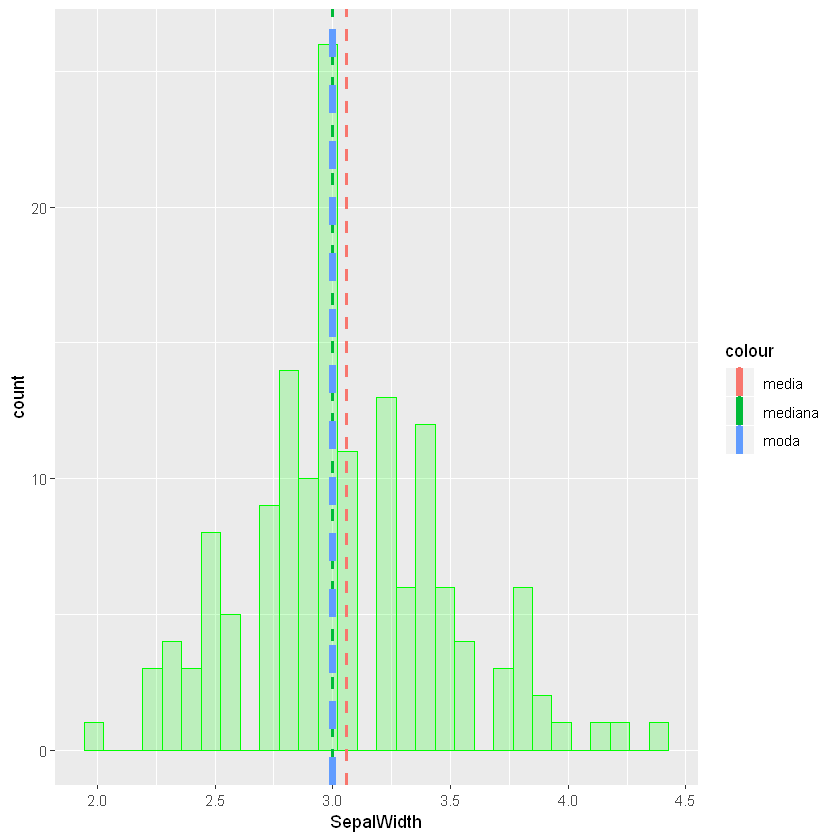

In [72]:
p2 <- hg + geom_vline(
    aes(xintercept=median(SepalWidth), color="mediana"), 
    linetype="dashed",
    size=1
)+ geom_vline(
    aes(xintercept=mean(SepalWidth), color="media"), 
    linetype="dashed",
    size=1
)+ geom_vline(
    aes(xintercept=3, color="moda"), 
    linetype="dashed",
    size=2
)
p2

### Medidas de dispersión
Parámetros estadísticos que indican como se alejan los datos respecto de la media aritmética. Sirven como indicador de la variabilidad de los datos. Las medidas de dispersión más utilizadas son el rango, la desviación estándar y la varianza.

__Varianza:__ utilizado para medir la dispersión de los valores de una variable respecto a la media. Corresponde a la media aritmética de los cuadrados de las desviaciones respecto a la media. Su expresión matemática es: 

<img src="img/Varianza_formula.png" alt="Varianza" style="width: 180px;"/>

In [17]:
var(SepalWidth)

[1] 0.1899794

__Desviación estánda:__ La desviación estándar mide el grado de disersión de los datos con respecto a la media, se denota como s para una muestra o como σ para la población. Se define como la raiz cuadrada de la varianza.

*Mientras menor sea la desviación estándar, los datos son más homogéneos, es decir existe menor dispersión, el incremento de los valores de la desviación estándar indica una mayor variabilidad de los datos.*

In [18]:
sd(SepalWidth)

[1] 0.4358663

### Medidas de Forma
son aquellas que nos muestran si una distribución de frecuencia tiene características especiales como simetría, asimetría, nivel de concentración de datos y nivel de apuntamiento que la clasifiquen en un tipo particular de distribución.

Para analizar estos asepctos recurriremos a dos tipos de medida:

* Coeficiente de asimetria de Fischer.
* Coeficiente de curtosis a apuntamiento de Fisher.

In [73]:
# install.packages("e1071")
# install.packages("rcompanion")
# install.packages("UsingR")
library(e1071)
library(UsingR)
library(rcompanion)

__COEFIENTE DE ASIMETRÍA DE FISHER:__ Una distribución es simétrica cuando al trazar una vertical, en el diagrama de barras o histograma de una variable, según sea esta discreta o continua, por el valor de la media, esta vertical se transforma en eje de simetría y entonces decimos que la distribución es simétrica. En caso contrario, dicha distribución será asimétrica o diremos que presenta asimetría.

La asimetría puede ser de dos tipos:

* Asimétrica por la derecha.
* Asimétrica por la izquierda.
<img src="img/asimetria.gif" alt="Varianza" style="width: 180px;"/>

In [74]:
skewness(SepalWidth)
help(skewness)

[1] 0.3126147

__COEFIENTE DE CURTOSIS O APUNTAMIENTO DE FISHER:__ al igual que con la simetría hemos de tomar una referencia para ver si la distribución de los datos es apuntada o no. La referencia citada es la distribución normal, y así distinguiremos tres casos:

* __Leptocúrtica__, si la distribución es más picuda que la normal, $g_{2}$>0 
* __Mesocúrtica__, si la distribución es igual a la normal, $g_{2}$=0
* __Platicúrtica__, si la distribución es más aplastada que la normal. $g_{2}$<0

<img src="img/curtosis.png" alt="Varianza" style="width: 300px;"/>

In [27]:
kurtosis(SepalWidth)

[1] 0.1387047

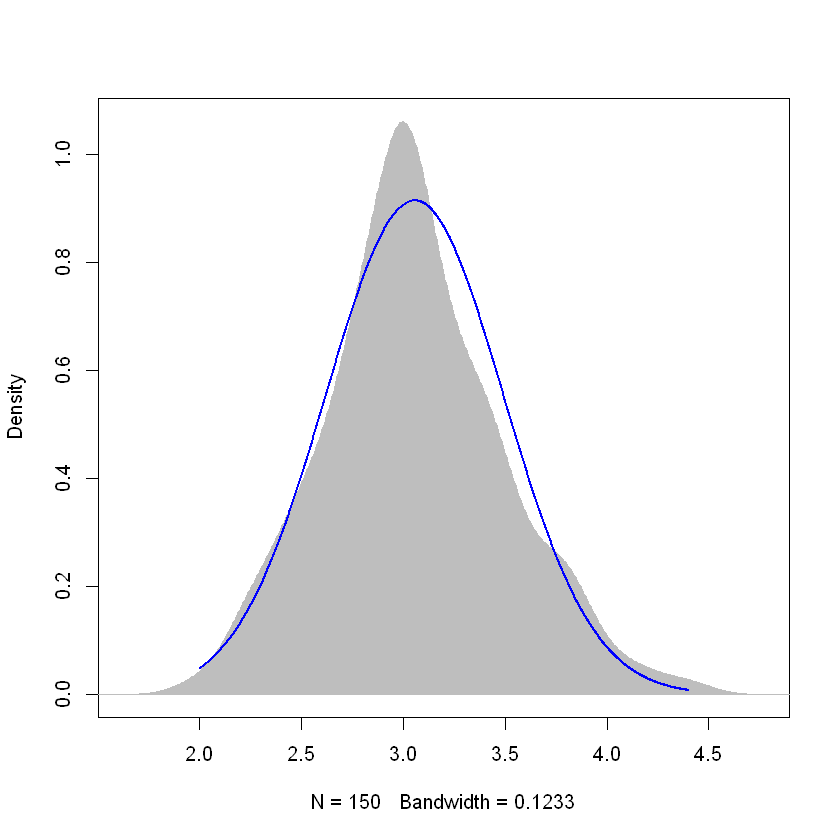

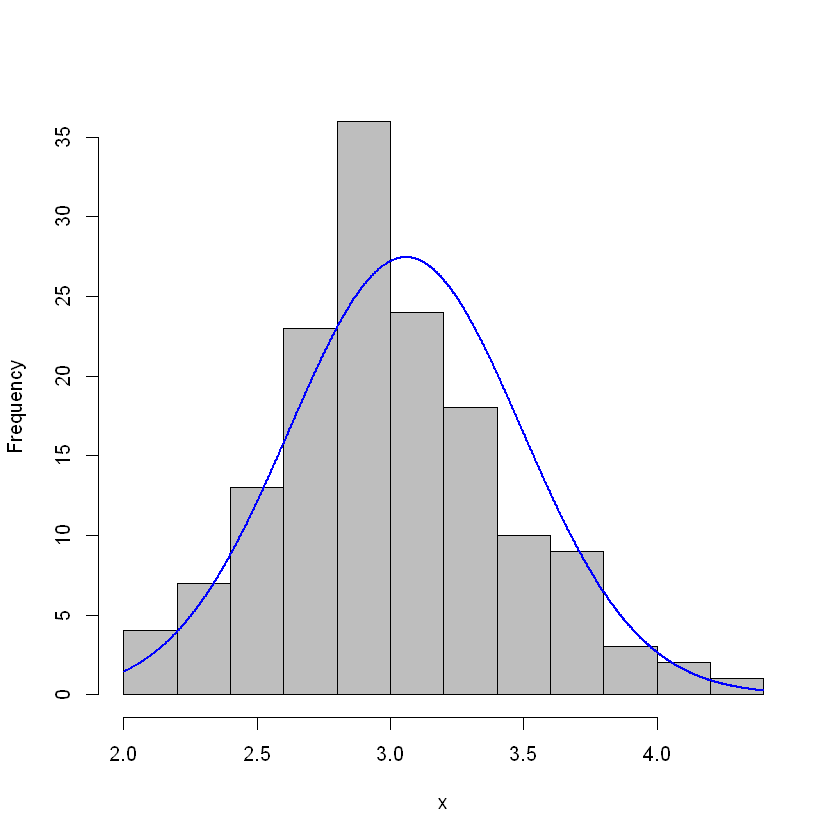

In [77]:
plotNormalDensity(SepalWidth)
plotNormalHistogram(SepalWidth)

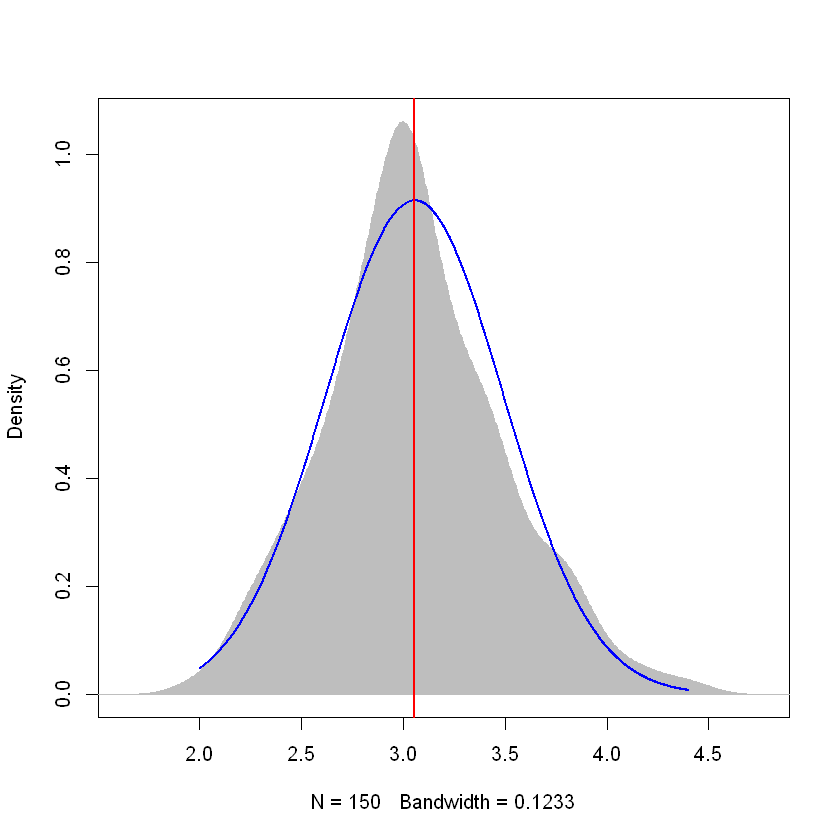

In [79]:
plotNormalDensity(SepalWidth)
abline(v = mean(SepalWidth), col = "red", lwd = 2)
text(mean(SepalWidth)+0.12, moda(SepalWidth)+7 , "mean", cex = 1)